# LGBM & XGBM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Exploratory Data Analysis (EDA):

In [2]:
test=pd.read_csv('Titanic_test.csv',index_col=[0])

In [3]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [5]:
train=pd.read_csv('Titanic_train.csv',index_col=[0])

In [6]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

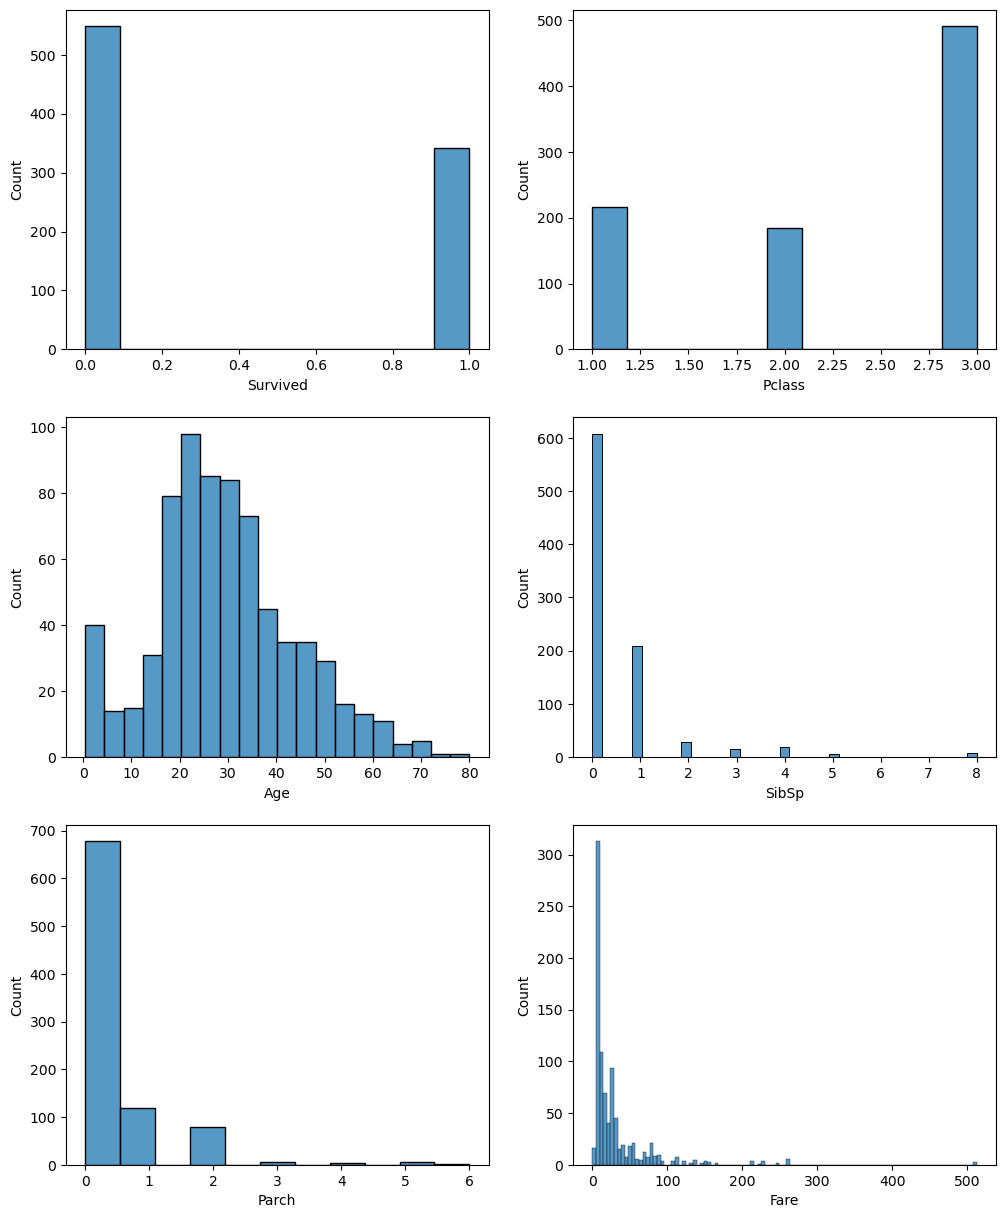

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(12, 15))
# Correct way to use seaborn.histplot on a specific axes
sns.histplot(data=train, x='Survived', ax=axs[0,0])
sns.histplot(data=train, x='Pclass', ax=axs[0,1])
sns.histplot(data=train, x='Age', ax=axs[1,0])
sns.histplot(data=train, x='SibSp', ax=axs[1,1])
sns.histplot(data=train, x='Parch', ax=axs[2,0])
sns.histplot(data=train, x='Fare', ax=axs[2,1])

plt.show()

In [11]:
numerical_feature=[['Age', 'Pclass','SibSp','Parch','Fare']]

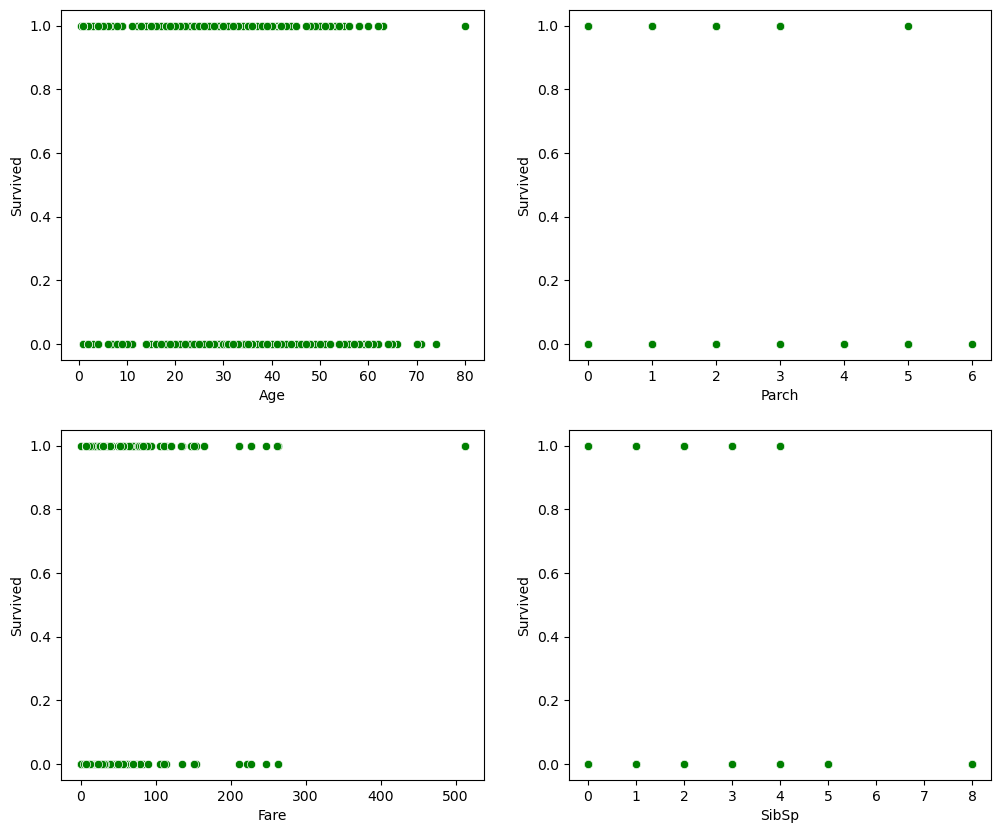

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(data=train,x='Age',y='Survived',color='green',ax=axs[0,0])
sns.scatterplot(data=train,x='Parch',y='Survived',color='green',ax=axs[0,1])
sns.scatterplot(data=train,x='Fare',y='Survived',color='green',ax=axs[1,0])
sns.scatterplot(data=train,x='SibSp',y='Survived',color='green',ax=axs[1,1])
plt.show()

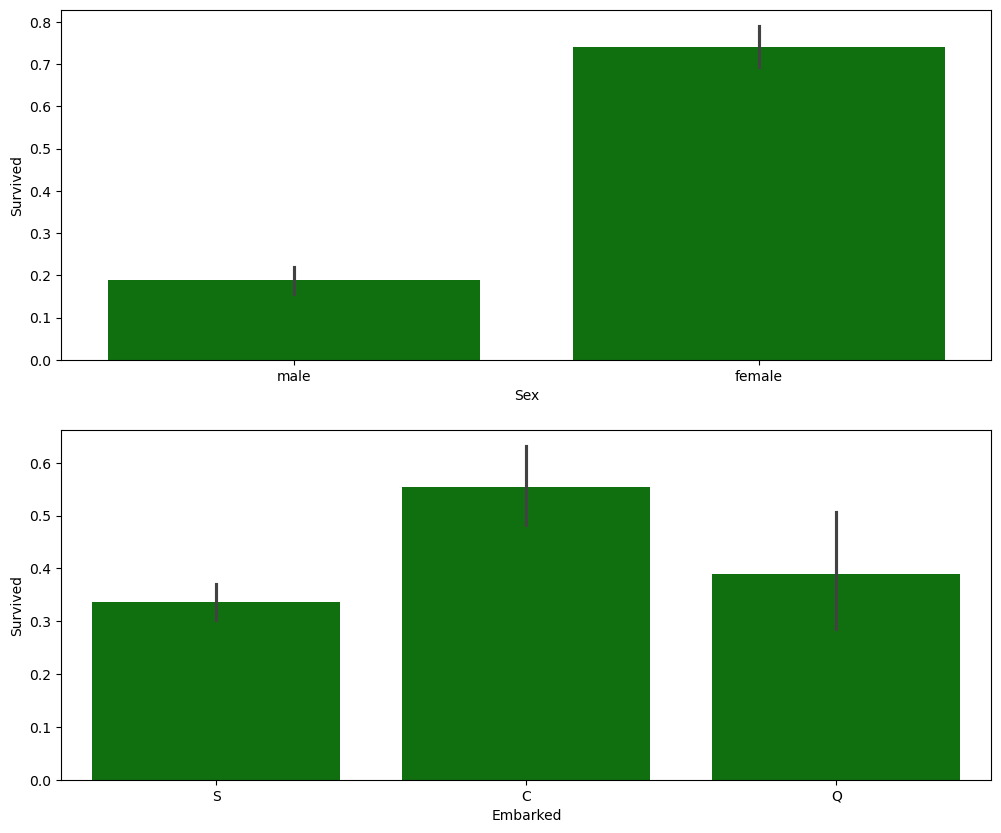

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10))
sns.barplot(data=train,x='Sex',y='Survived',color='green',ax=axs[0])
sns.barplot(data=train,x='Embarked',y='Survived',color='green',ax=axs[1])
plt.show()

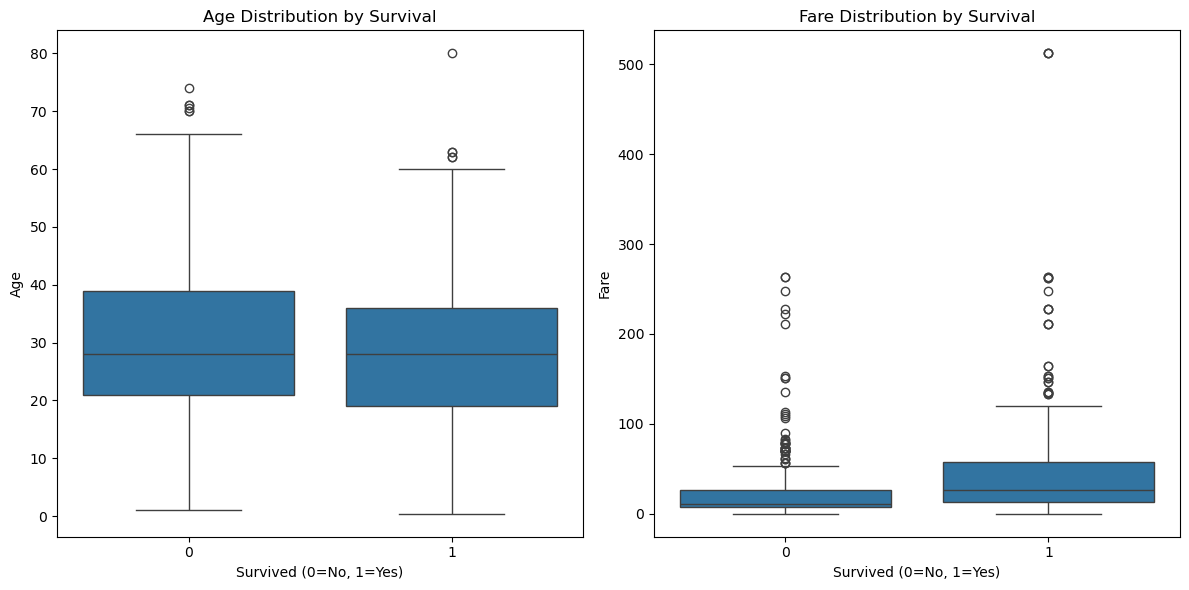

In [14]:
numerical_cols_for_boxplot = ['Age', 'Fare']
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols_for_boxplot):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x='Survived', y=col, data=train)
    plt.title(f'{col} Distribution by Survival')
    plt.xlabel('Survived (0=No, 1=Yes)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Data Preprocessing:

<Axes: >

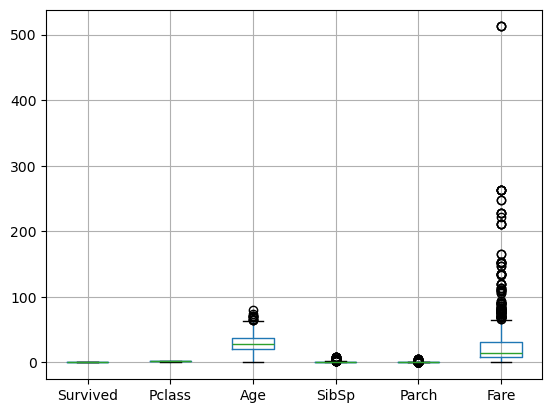

In [15]:
train.boxplot()

In [16]:
def outlier_capping(train,column):
    Q1=train[column].quantile(0.25)
    Q3=train[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    train[column]=train[column].apply(lambda x:lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
for col in train.select_dtypes(['int','float']).columns:
    outlier_capping(train,col)

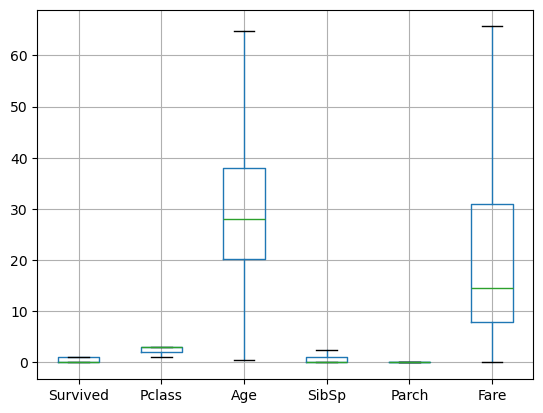

In [17]:
train.boxplot()
plt.show()

<Axes: >

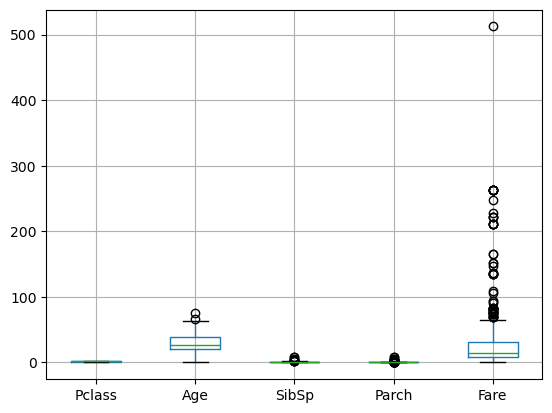

In [18]:
test.boxplot()

In [19]:
def outlier_capping(test,column):
    Q1=test[column].quantile(0.25)
    Q3=test[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    test[column]=test[column].apply(lambda x:lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
for col in test.select_dtypes(['int','float']).columns:
    outlier_capping(test,col)

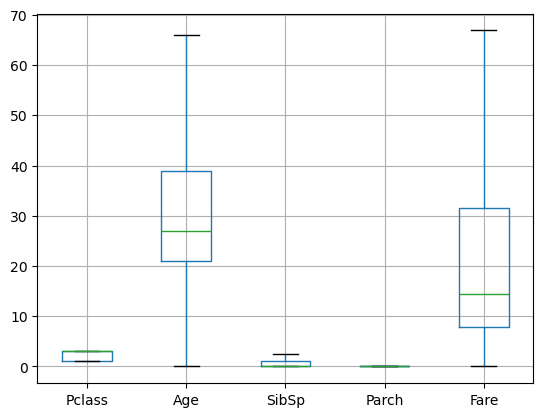

In [20]:
test.boxplot()
plt.show()

In [21]:
df = pd.concat([train.drop('Survived', axis=1), test], ignore_index=True)

In [22]:
df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,65.6344,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0.0,0.0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0.0,0.0,PC 17758,66.9063,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0.0,0.0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0.0,0.0,359309,8.0500,NaN,S


In [23]:
df.isnull().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [24]:
median = df['Age'].median()
median

28.0

In [25]:
df.fillna({'Age':median}, inplace=True)

In [26]:
median = df['Fare'].median()
median

14.4542

In [27]:
df.fillna({'Fare':median}, inplace=True)

In [28]:
mode = df['Embarked'].mode()
mode

0    S
Name: Embarked, dtype: object

In [29]:
df.fillna({'Embarked':mode}, inplace=True)

In [30]:
df['Has_Cabin'] = df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

In [31]:
df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,65.6344,C85,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,28.0,0.0,0.0,A.5. 3236,8.0500,NaN,S,0
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0.0,0.0,PC 17758,66.9063,C105,C,1
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0.0,0.0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
1307,3,"Ware, Mr. Frederick",male,28.0,0.0,0.0,359309,8.0500,NaN,S,0


In [32]:
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

In [33]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin
0,3,male,22.0,1.0,0.0,7.2500,S,0
1,1,female,38.0,1.0,0.0,65.6344,C,1
2,3,female,26.0,0.0,0.0,7.9250,S,0
3,1,female,35.0,1.0,0.0,53.1000,S,1
4,3,male,35.0,0.0,0.0,8.0500,S,0
...,...,...,...,...,...,...,...,...
1304,3,male,28.0,0.0,0.0,8.0500,S,0
1305,1,female,39.0,0.0,0.0,66.9063,C,1
1306,3,male,38.5,0.0,0.0,7.2500,S,0
1307,3,male,28.0,0.0,0.0,8.0500,S,0


In [34]:
categorical_cols_to_encode = ['Sex', 'Embarked', 'Pclass']


In [35]:
all_data= pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)

In [36]:
all_data

,Age,SibSp,Parch,Fare,Has_Cabin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,22.0,1.0,0.0,7.2500,0,True,False,True,False,True
1,38.0,1.0,0.0,65.6344,1,False,False,False,False,False
2,26.0,0.0,0.0,7.9250,0,False,False,True,False,True
3,35.0,1.0,0.0,53.1000,1,False,False,True,False,False
4,35.0,0.0,0.0,8.0500,0,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0.0,0.0,8.0500,0,True,False,True,False,True
1305,39.0,0.0,0.0,66.9063,1,False,False,False,False,False
1306,38.5,0.0,0.0,7.2500,0,True,False,True,False,True
1307,28.0,0.0,0.0,8.0500,0,True,False,True,False,True


In [37]:
X_processed = all_data.iloc[:len(train)]
X_processed

,Age,SibSp,Parch,Fare,Has_Cabin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,22.0,1.0,0.0,7.2500,0,True,False,True,False,True
1,38.0,1.0,0.0,65.6344,1,False,False,False,False,False
2,26.0,0.0,0.0,7.9250,0,False,False,True,False,True
3,35.0,1.0,0.0,53.1000,1,False,False,True,False,False
4,35.0,0.0,0.0,8.0500,0,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,27.0,0.0,0.0,13.0000,0,True,False,True,True,False
887,19.0,0.0,0.0,30.0000,1,False,False,True,False,False
888,28.0,1.0,0.0,23.4500,0,False,False,True,False,True
889,26.0,0.0,0.0,30.0000,1,True,False,False,False,False


In [38]:
X_test_final = all_data.iloc[len(train):]
X_test_final

,Age,SibSp,Parch,Fare,Has_Cabin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
891,34.5,0.0,0.0,7.8292,0,True,True,False,False,True
892,47.0,1.0,0.0,7.0000,0,False,False,True,False,True
893,62.0,0.0,0.0,9.6875,0,True,True,False,True,False
894,27.0,0.0,0.0,8.6625,0,True,False,True,False,True
895,22.0,1.0,0.0,12.2875,0,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0.0,0.0,8.0500,0,True,False,True,False,True
1305,39.0,0.0,0.0,66.9063,1,False,False,False,False,False
1306,38.5,0.0,0.0,7.2500,0,True,False,True,False,True
1307,28.0,0.0,0.0,8.0500,0,True,False,True,False,True


In [39]:
y = train[['Survived']]
y

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0
...,...
887,0
888,1
889,0


In [40]:
X_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         891 non-null    float64
 1   SibSp       891 non-null    float64
 2   Parch       891 non-null    float64
 3   Fare        891 non-null    float64
 4   Has_Cabin   891 non-null    int64  
 5   Sex_male    891 non-null    bool   
 6   Embarked_Q  891 non-null    bool   
 7   Embarked_S  891 non-null    bool   
 8   Pclass_2    891 non-null    bool   
 9   Pclass_3    891 non-null    bool   
dtypes: bool(5), float64(4), int64(1)
memory usage: 39.3 KB


In [41]:
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   SibSp       418 non-null    float64
 2   Parch       418 non-null    float64
 3   Fare        418 non-null    float64
 4   Has_Cabin   418 non-null    int64  
 5   Sex_male    418 non-null    bool   
 6   Embarked_Q  418 non-null    bool   
 7   Embarked_S  418 non-null    bool   
 8   Pclass_2    418 non-null    bool   
 9   Pclass_3    418 non-null    bool   
dtypes: bool(5), float64(4), int64(1)
memory usage: 18.5 KB


# Building Predictive Models:

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [44]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(712, 10)
(179, 10)
(712, 1)
(179, 1)


In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
import xgboost as xgb

In [47]:
xgb1=xgb.XGBClassifier(n_estimator=100,learning_rate=0.5,reg_alpha=10,reg_lambda=10,min_child_weight=2,feature=1)

In [48]:
xgb1.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature=1,
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=100, n_estimators=None, ...)

In [49]:
y_pred_xgb=xgb1.predict(X_val)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_xgb=accuracy_score(y_val,y_pred_xgb)
accuracy_xgb

0.7877094972067039

In [52]:
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
precision_xgb = precision_score(y_val, y_pred_xgb)
recall_xgb = recall_score(y_val, y_pred_xgb)
f1_xgb = f1_score(y_val, y_pred_xgb)

In [53]:
import lightgbm as lgb

In [54]:
lgb1=lgb.LGBMClassifier(n_estimator=100,learning_rate=0.5,reg_alpha=10,reg_lambda=10,min_child_weight=2,feature=1,boosting_type='goss',top_rate=0.3,other_rate=0.2,max_bins=10)

In [55]:
lgb1.fit(X_train,y_train)

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: feature
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: feature
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 36
[LightGBM] [Info] Number of data points in the tr

LGBMClassifier(boosting_type='goss', feature=1, learning_rate=0.5, max_bins=10,
               min_child_weight=2, n_estimator=100, other_rate=0.2,
               reg_alpha=10, reg_lambda=10, top_rate=0.3)

In [56]:
y_pred_lgbm=lgb1.predict(X_val)

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: feature
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


In [57]:
accuracy_lgbm=accuracy_score(y_val,y_pred_lgbm)
accuracy_lgbm

0.8100558659217877

In [61]:
accuracy_lgbm = accuracy_score(y_val, y_pred_lgbm)
precision_lgbm = precision_score(y_val, y_pred_lgbm)
recall_lgbm = recall_score(y_val, y_pred_lgbm)
f1_lgbm = f1_score(y_val, y_pred_lgbm)

In [63]:
from sklearn.model_selection import LeaveOneOut,KFold,StratifiedKFold

In [65]:
leave=LeaveOneOut()

In [67]:
for train_split,test_split in leave.split(X_processed, y):
    print (train_split,test_split)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [69]:
kfold=KFold(n_splits=5,shuffle=True)


In [71]:
for train_split,test_split in kfold.split(X_processed, y):
    print (train_split,test_split)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  18
  19  20  22  23  24  25  29  30  31  32  33  34  35  37  39  40  41  43
  44  45  46  47  48  49  51  52  54  55  56  57  58  59  60  61  62  63
  65  66  67  68  69  70  72  73  74  77  78  79  80  81  82  83  84  85
  86  88  89  90  91  92  94  96  97  98  99 100 101 102 103 104 106 107
 109 111 112 113 115 116 117 118 119 120 122 126 127 128 129 131 132 133
 134 135 136 137 138 139 140 141 143 144 145 147 149 150 151 152 153 155
 156 157 158 159 160 162 163 164 165 166 169 170 171 172 173 175 176 177
 178 179 181 182 183 184 185 187 188 189 190 192 193 194 195 196 197 198
 200 201 202 203 204 205 206 207 208 209 211 212 213 214 215 216 219 220
 221 222 223 224 225 226 227 228 229 230 232 233 234 236 237 238 239 240
 242 243 244 245 248 249 250 251 254 255 256 257 258 259 261 264 265 266
 267 270 271 272 273 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 291 292 296 297 298 299 300 301 303 304 30

In [73]:
str_kfold=StratifiedKFold(n_splits=5,shuffle=True)

In [75]:
for train_split,test_split in str_kfold.split(X_processed, y):
    print (train_split,test_split)

[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  24  25  26  27  28  30  31  32  33  39  40  41  42  43
  44  46  47  49  51  53  54  55  57  58  59  61  62  63  65  67  68  69
  70  71  73  74  75  76  77  78  79  80  81  82  83  84  85  87  89  90
  91  94  95  96  98  99 101 102 103 104 105 106 107 108 109 110 111 112
 113 115 117 118 119 120 121 122 123 124 126 127 129 130 131 132 133 134
 135 136 138 140 143 144 145 147 148 149 150 151 152 154 155 156 160 161
 162 163 164 165 166 168 170 171 173 174 175 176 177 178 179 180 181 182
 183 184 185 187 188 189 191 192 193 194 195 196 197 199 200 201 202 203
 204 205 206 207 210 211 212 213 214 215 216 217 218 221 223 224 225 226
 227 228 230 232 233 234 237 238 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 257 259 260 261 262 263 265 266 268 269 270 271 272
 273 274 278 279 280 281 283 284 286 288 289 290 291 292 294 295 297 298
 299 301 302 303 304 306 307 308 310 311 313 314 31

In [77]:
from sklearn.linear_model import LogisticRegression

In [79]:
from sklearn.model_selection import cross_val_score

In [81]:
cross_val_score(LogisticRegression(),X_processed, y,scoring='accuracy',cv=kfold).mean()

0.8069549934090766

In [83]:
cross_val_score(LogisticRegression(),X_processed, y,scoring='accuracy',cv=str_kfold).mean()

0.7980478312723621

# Comparative Analysis:

In [87]:
results = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_lgbm, accuracy_xgb],
    'Precision': [precision_lgbm, precision_xgb],
    'Recall': [recall_lgbm, recall_xgb],
    'F1-Score': [f1_lgbm, f1_xgb]
})
print("\n--- Model Performance Comparison ---")
print(results)


--- Model Performance Comparison ---
      Model  Accuracy  Precision    Recall  F1-Score
0  LightGBM  0.810056    0.80303  0.716216  0.757143
1   XGBoost  0.787709    0.78125  0.675676  0.724638


In [91]:
import matplotlib.pyplot as plt

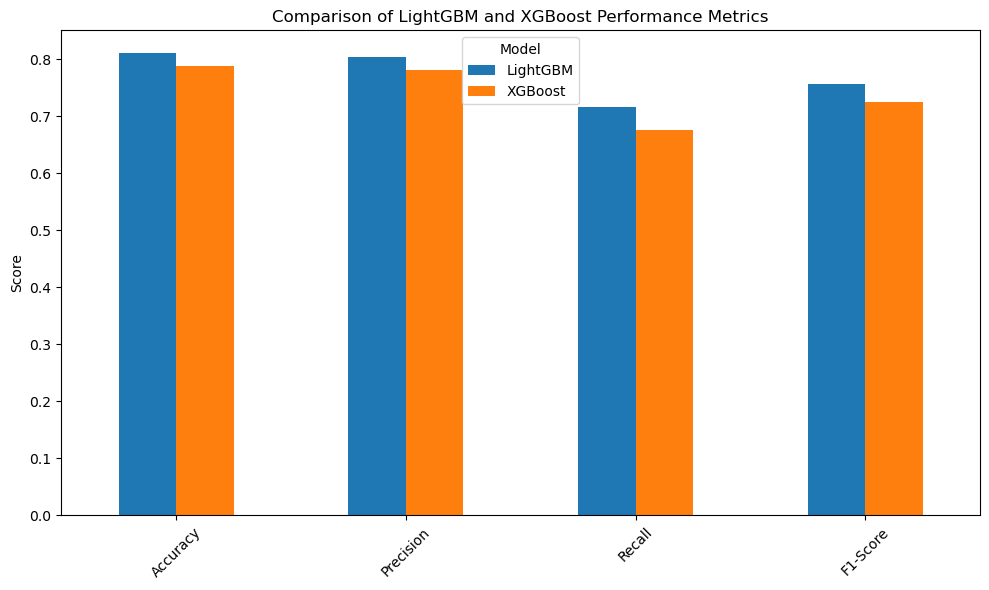

In [95]:
metrics_df = results.set_index('Model').T
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("Comparison of LightGBM and XGBoost Performance Metrics") # [cite: 24]
plt.ylabel("Score") # [cite: 24]
plt.xticks(rotation=45)
plt.legend(title="Model")
plt.tight_layout()
plt.show()